In [12]:
import os
import random
import hickle as hkl
import pickle as pickle
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

In [13]:
DATADIR = r'./Data/'
TRAIN_DATADIR = os.path.join(DATADIR, 'Train_Data')
TEST_DATADIR = os.path.join(DATADIR, 'Test_Data')

In [14]:
CATEGORIES = []
for d in os.listdir(TRAIN_DATADIR):
    CATEGORIES.append(d)
print(CATEGORIES)

['Fire', 'Non_Fire']


./Data/Train_Data\Fire\F_0.jpg
./Data/Train_Data\Fire\F_1.jpg
./Data/Train_Data\Fire\F_10.jpg
./Data/Train_Data\Fire\F_100.jpg
./Data/Train_Data\Fire\F_1000.jpg
./Data/Train_Data\Fire\F_1001.jpg
./Data/Train_Data\Fire\F_1002.jpg
./Data/Train_Data\Fire\F_1003.jpg
./Data/Train_Data\Fire\F_1004.jpg
./Data/Train_Data\Fire\F_1005.jpg
./Data/Train_Data\Non_Fire\NF_0.jpg
./Data/Train_Data\Non_Fire\NF_1.jpg
./Data/Train_Data\Non_Fire\NF_10.jpg
./Data/Train_Data\Non_Fire\NF_100.jpg
./Data/Train_Data\Non_Fire\NF_1000.jpg
./Data/Train_Data\Non_Fire\NF_1001.jpg
./Data/Train_Data\Non_Fire\NF_1002.jpg
./Data/Train_Data\Non_Fire\NF_1004.jpg
./Data/Train_Data\Non_Fire\NF_1005.jpg
./Data/Train_Data\Non_Fire\NF_1006.jpg


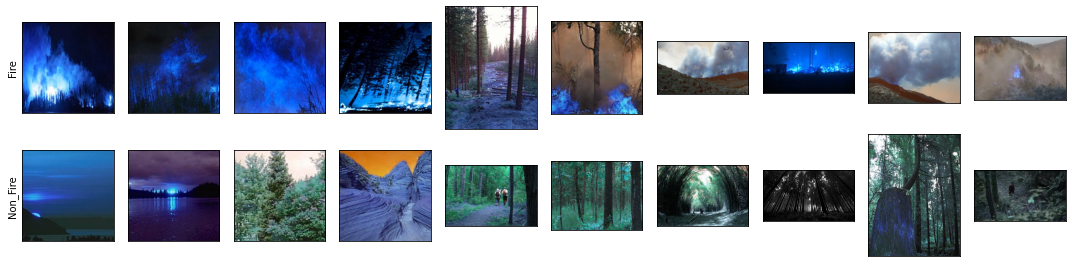

In [15]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATADIR,c)
    for img in os.listdir(path):
        print(os.path.join(path,img))
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [16]:
IMG_DIM_SIZE = 160

In [17]:
train_data = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            train_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(train_data))

100%|██████████| 2499/2499 [00:08<00:00, 301.58it/s] 

4608


In [18]:
test_data = []
for c in CATEGORIES:
    path = os.path.join(TEST_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            test_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(test_data))


100%|██████████| 25/25 [00:00<00:00, 108.70it/s]

50


In [19]:
print(test_data)
random.shuffle(train_data)
random.shuffle(test_data)

[[array([[[  1,  20,  53],
        [  2,  21,  54],
        [  2,  21,  54],
        ...,
        [  8,  41, 104],
        [  8,  41, 104],
        [  8,  41, 104]],

       [[  1,  20,  53],
        [  2,  21,  54],
        [  2,  21,  54],
        ...,
        [  8,  41, 104],
        [  8,  41, 104],
        [  8,  41, 104]],

       [[  1,  20,  53],
        [  2,  21,  54],
        [  2,  21,  54],
        ...,
        [  8,  41, 104],
        [  8,  41, 104],
        [  8,  41, 104]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1

In [20]:
X_train = []
Y_train = []

for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

pickle_out = open("./data/pickle/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()



X_train= (4608, 160, 160, 3) Y_train= (4608,)


In [21]:
X_test = []
Y_test = []

for img, label in test_data:
    X_test.append(img)
    Y_test.append(label)
    
X_test = np.array(X_test).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")


pickle_out = open("./data/pickle/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()


X_test= (50, 160, 160, 3) Y_test= (50,)


In [22]:
print(Y_train)
print(Y_test)




[1 1 1 ... 1 1 1]
[1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 0]
